### Adhlere Coffy

### PUI Section 001

### October 13, 2015

### HW4 - Task 2: Goodness of Fit Tests

In [1]:
#module import

import os
import pandas as pd
import numpy as np
import scipy.stats
import pylab as pl
%pylab inline

import json
s = json.load(open(os.getenv('PUI2015')+"/plotformat.json"))

Populating the interactive namespace from numpy and matplotlib


In [2]:
#create a random distributions
np.random.seed(324)

#random generators for normal, binomial, and poisson distributions
normDist = np.random.randn(10000)
binomDist = np.random.binomial(1,0.5, 10000)
poissDist = np.random.poisson(1,10000)

#printing results for K-S & A-D (Anderson Darling) tests per each distribution

#trying to test formatting for scipy outputs....FAIL
float_formatter = lambda x: "%.4f" %x
np.set_printoptions(formatter={'float_kind':float_formatter})

#Normal (Gaussian) Distribution
print "Normal on normal: K-S test", scipy.stats.kstest(normDist, 'norm')
print "Normal on normal: A-D test", scipy.stats.anderson(normDist, dist='norm')

#Binomial Distribution
print "\nBinomial on normal: K-S test", scipy.stats.kstest(binomDist, 'norm')
print "Binomial on normal: A-D test", scipy.stats.anderson(binomDist, dist='norm')

#Poisson Distribution
print "\nPoisson on normal: K-S test", scipy.stats.kstest(poissDist, 'norm')
print "Poisson on normal: A-D test", scipy.stats.anderson(poissDist, dist='norm')

threshold = scipy.stats.anderson(normDist, dist='norm')[1][scipy.stats.anderson(normDist, dist='norm')[2]==[1.0]]
print '\nThreshold is', threshold

Normal on normal: K-S test (0.0077821528752504698, 0.57995751971992593)
Normal on normal: A-D test (0.23362936526609701, array([0.5760, 0.6560, 0.7870, 0.9180, 1.0920]), array([15.0000, 10.0000, 5.0000, 2.5000, 1.0000]))

Binomial on normal: K-S test (0.5, 0.0)
Binomial on normal: A-D test (1797.153169865247, array([0.5760, 0.6560, 0.7870, 0.9180, 1.0920]), array([15.0000, 10.0000, 5.0000, 2.5000, 1.0000]))

Poisson on normal: K-S test (0.5, 0.0)
Poisson on normal: A-D test (609.01168766557566, array([0.5760, 0.6560, 0.7870, 0.9180, 1.0920]), array([15.0000, 10.0000, 5.0000, 2.5000, 1.0000]))

Threshold is [1.0920]


In [3]:
#performing the KL test
norm_distpdf, mybins_norm, = np.histogram(normDist, density=True)
binom_distpdf, mybins_binom, = np.histogram(binomDist, density=True)
poiss_distpdf, mybins_poiss, = np.histogram(poissDist, density=True)

#calculate the bin centers
norm_bincenters = mybins_norm[:-1] + 0.5*(mybins_norm[1] - mybins_norm[0])
binom_bincenters = mybins_binom[:-1] + 0.5*(mybins_binom[1] - mybins_binom[0])
poiss_bincenters = mybins_poiss[:-1] + 0.5*(mybins_poiss[1] - mybins_poiss[0])

print "Normal on normal: ", scipy.stats.entropy(norm_distpdf, scipy.stats.norm.pdf(norm_bincenters))
print "Binomial on normal: ", scipy.stats.entropy(binom_distpdf, scipy.stats.norm.pdf(binom_bincenters))
print "Poisson on normal: ", scipy.stats.entropy(poiss_distpdf, scipy.stats.norm.pdf(poiss_bincenters))

Normal on normal:  0.00168636514394
Binomial on normal:  1.6846128039
Poisson on normal:  0.494413329173


## Binomial Goodness of Fit Test

__Something to remember__!! 
Using NumPy zeros/ones/empty is faster than just initializing an array. Arrays are stored in contiguous blocks of memory. If you want to add rows/columns to an existing array, the entire array needs to be copied to a new block of memory to make room for the new row/column. Most efficient way to use arrays is to create one with dummy elements but of final the size expected for the array. **See below**!

In [4]:
#create the array that will determine the size of the test samples
sizeArray = range(1,1000)

#zero arrays
binom_ks = np.zeros(len(sizeArray))
binom_ad = np.zeros(len(sizeArray))
binom_kl = np.zeros(len(sizeArray))

def mynorm(x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)

p = 0.5

In [5]:
for i,j in enumerate(sizeArray):
    p = 0.35
    binom_Dist = np.random.binomial(j,p,1000)
    
    binom_ks[i] = scipy.stats.kstest(binom_Dist, mynorm, args=(j*p, j*p*(1.0-p)))[0]
    binom_ad[i] = scipy.stats.anderson(binom_Dist, dist='norm')[0]
    
    #bins for KL test
    mybins = np.linspace(min(binom_Dist), max(binom_Dist), 10)
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
    binom_kl[i] = scipy.stats.entropy(np.histogram(binom_Dist,bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=j*p, scale=j*p*(1.0-p)))

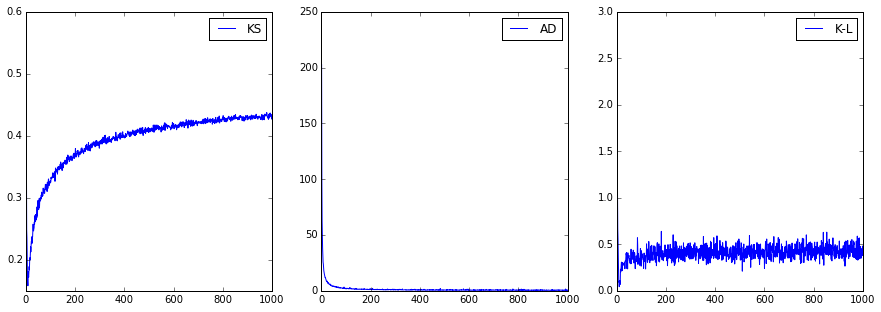

In [6]:
fig = figure(figsize = (15,5))
fig.add_subplot(131)
plot(sizeArray, binom_ks, label='KS')
legend()

fig.add_subplot(132)
plot(sizeArray, binom_ad,  label='AD')
plot()
legend()

fig.add_subplot(133)
plot(sizeArray, binom_kl, label='K-L ')
legend()

__Caption__: Graphs above demonstrate the impact population size has on the 'nature' of the binomial distribution. As size increases it converges on a value acting as a normal distribution would.

## Poisson Goodness of Fit Test

In [7]:
#create the array that will determine the size of the test samples
sizeArray = range(1,1000)

#zero arrays
poiss_ks = np.ones(len(sizeArray))
poiss_ad = np.ones(len(sizeArray))
poiss_kl = np.ones(len(sizeArray))

def mynorm(x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)

p = 0.5

In [8]:
for i,j in enumerate(sizeArray):
    p = 0.35
    poiss_Dist = np.random.poisson(j,1000)
    
    poiss_ks[i] = scipy.stats.kstest(poiss_Dist, mynorm, args=(j*p, j*p*(1.0-p)))[0]
    poiss_ad[i] = scipy.stats.anderson(poiss_Dist, dist='norm')[0]
    
    #bins for KL test
    mybins = np.linspace(min(poiss_Dist), max(poiss_Dist), 10)
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
    poiss_kl[i] = scipy.stats.entropy(np.histogram(poiss_Dist,bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=j*p, scale=j*p*(1.0-p)))

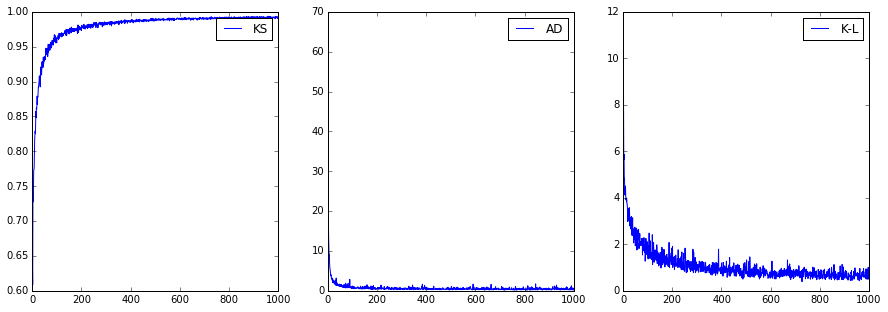

In [9]:
fig = figure(figsize = (15,5))
fig.add_subplot(131)
plot(sizeArray, poiss_ks, label='KS')
legend()

fig.add_subplot(132)
plot(sizeArray, poiss_ad,  label='AD')
plot()
legend()

fig.add_subplot(133)
plot(sizeArray, poiss_kl, label='K-L ')
legend()